In [18]:
#手の表面を1フレームずつ画像に変換処理--(pro1)
import cv2
import os

save_dir="./hands/3nensei/yamaguchi/ura"
cap=cv2.VideoCapture("./MOV/yamaguchiura.MOV")
if not cap.isOpened():
    sys.exit()
n= 0
while True:
    # read()でフレーム画像が読み込めたかを示すbool、フレーム画像の配列ndarrayのタプル
    is_image,frame_img = cap.read()
    if is_image:
        # 画像を保存
        outfile=save_dir+"/"+str(n)+".jpg"
        cv2.imwrite(outfile, frame_img)
    else:
        # フレーム画像が読込なかったら終了
        break
    n += 1

cap.release()
print("ok")

ok


In [ ]:
#画像ファイルを読み込んでNumpy形式に変換--(pro2)
import numpy as np
from PIL import Image
import os,glob,random

outfile="./omoteura256.npz"#変更必要
max_photo=16000
photo_size=256#変更必要
x=[]
y=[]

def main():
    glob_files("./hands/mine/omote",0)
    glob_files("./hands/mine/ura",1)
    glob_files("./hands/okutani/omote",2)
    glob_files("./hands/okutani/ura",3)
    glob_files("./hands/tochikubo/omote",4)
    glob_files("./hands/tochikubo/ura",5)
    glob_files("./hands/nakamura/omote",6)
    glob_files("./hands/nakamura/ura",7)
    glob_files("./hands/gotou/omote",8)
    glob_files("./hands/gotou/ura",9)
    np.savez(outfile,x=x,y=y)
    print("保存しました:"+outfile,len(x))
    
def glob_files(path,label):
    files=glob.glob(path+"/*.jpg")
    random.shuffle(files)
    num=0
    for f in files:
        if num>=max_photo: break
        num+=1
        img=Image.open(f)
        img=img.convert("RGB")
        img=img.resize((photo_size,photo_size))
        img=np.asarray(img)
        x.append(img)
        y.append(label)
if __name__=='__main__':
    main()

In [ ]:
%%time
#CNNモデルの構築とCNNモデルを用いた機械学習--(pro3)
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model


im_rows = 256 # 変更必要
im_cols = 256 # 変更必要
im_color = 3 
in_shape = (im_rows, im_cols, im_color)
nb_classes = 10 #変更必要

photos = np.load('./omoteura256.npz')#変更必要
x = photos['x']
y = photos['y']

x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

model = get_model(in_shape, nb_classes)


hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./hdf/256pix.hdf5') #変更必要


ここからは0番目の写真です


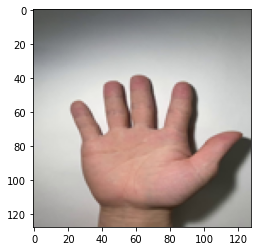

可能性が 93 %なので認証できません。
認証の結果は 奥谷君の表 でした。


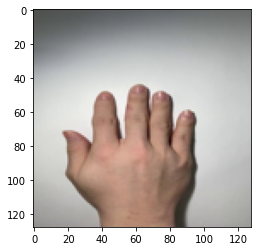

この写真は、 中村君の裏 です。
可能性は、 97 %です。

ここからは1番目の写真です


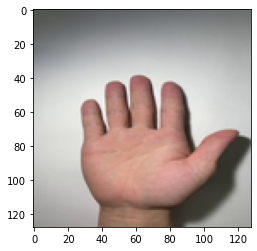

可能性が 66 %なので認証できません。
認証の結果は 栃窪先生の表 でした。


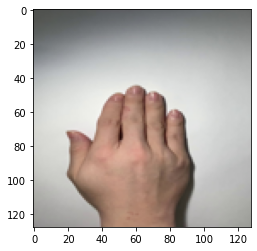

この写真は、 後藤さんの表 です。
可能性は、 98 %です。

ここからは2番目の写真です


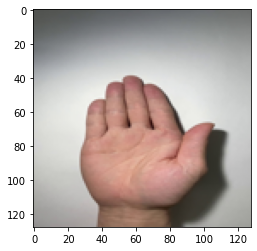

可能性が 69 %なので認証できません。
認証の結果は 栃窪先生の表 でした。


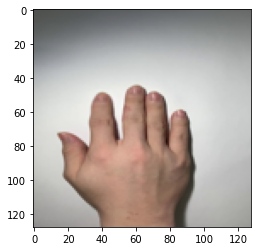

この写真は、 栃窪先生の表 です。
可能性は、 99 %です。

ここからは3番目の写真です


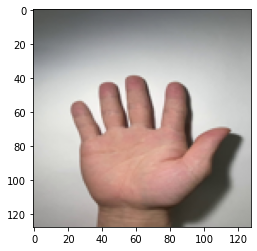

可能性が 78 %なので認証できません。
認証の結果は 奥谷君の表 でした。


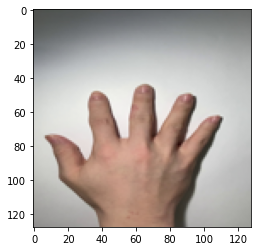

可能性が 50 %なので認証できません。
認証の結果は 栃窪先生の表 でした。

ここからは4番目の写真です


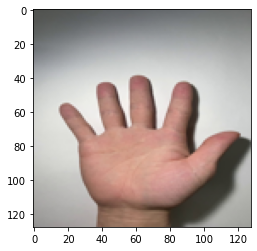

この写真は、 奥谷君の表 です。
可能性は、 96 %です。


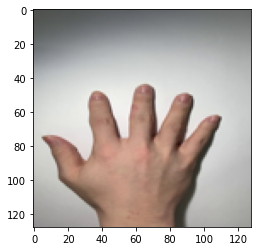

可能性が 52 %なので認証できません。
認証の結果は 栃窪先生の裏 でした。

ここからは5番目の写真です


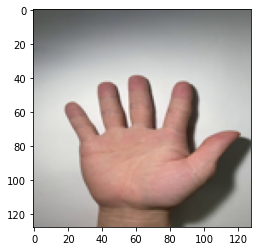

この写真は、 奥谷君の表 です。
可能性は、 99 %です。


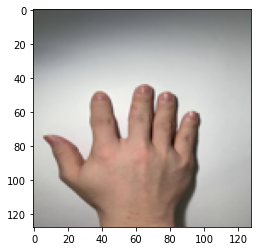

可能性が 53 %なので認証できません。
認証の結果は 栃窪先生の裏 でした。

ここからは6番目の写真です


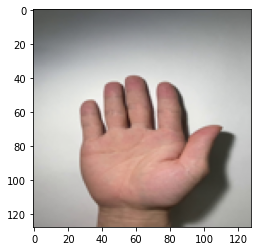

この写真は、 栃窪先生の表 です。
可能性は、 99 %です。


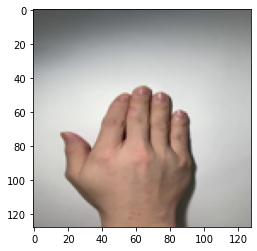

可能性が 50 %なので認証できません。
認証の結果は 栃窪先生の表 でした。

ここからは7番目の写真です


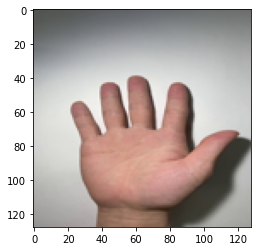

可能性が 90 %なので認証できません。
認証の結果は 奥谷君の表 でした。


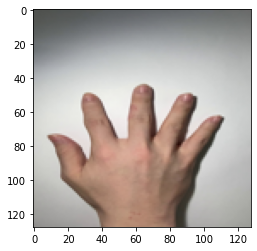

可能性が 72 %なので認証できません。
認証の結果は 栃窪先生の表 でした。

ここからは8番目の写真です


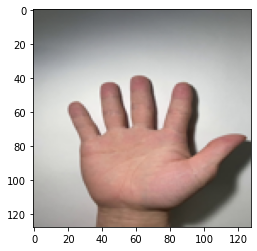

この写真は、 奥谷君の表 です。
可能性は、 99 %です。


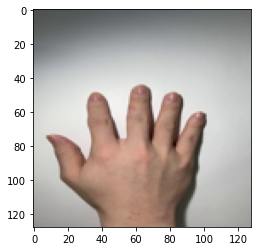

可能性が 94 %なので認証できません。
認証の結果は 中村君の裏 でした。

ここからは9番目の写真です


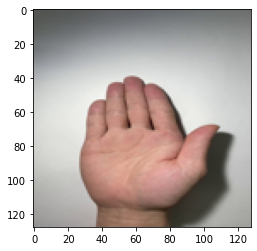

可能性が 81 %なので認証できません。
認証の結果は 栃窪先生の表 でした。


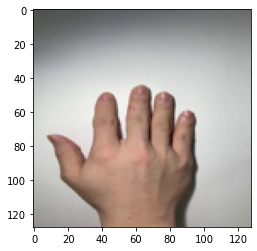

この写真は、 中村君の裏 です。
可能性は、 99 %です。


In [24]:
#CNNモデルを用いた機械学習--(pro8)
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model


def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model
target_omote=[]
target_ura=[]
for i in range(10):
    target_omote.append("./test/3nensei/yamaguchi/omote/"+str(i)+".jpg")#変更必要
    target_ura.append("./test/3nensei/yamaguchi/ura/"+str(i)+".jpg")#変更必要

#target_omote="./test/3nensei/arai/omote/1.jpg"#変更必要
#target_ura="./test/3nensei/arai/ura/1.jpg"#変更必要

im_rows = 128 #変更必要
im_cols = 128 #変更必要
im_color = 3 
in_shape = (im_rows, im_cols, im_color)
nb_classes = 10 #変更必要

LABELS=["江波戸の表","江波戸の裏","奥谷君の表","奥谷君の裏",
        "栃窪先生の表","栃窪先生の裏","中村君の表","中村君の裏",
        "後藤さんの表","後藤さんの裏"]


model = get_model(in_shape, nb_classes)
model.load_weights('./hdf/128pix.hdf5')#変更必要

def check_photo(path):
    img=Image.open(path)
    img=img.convert("RGB")
    img=img.resize((im_cols,im_rows))
    plt.imshow(img)
    plt.show()

    x=np.asarray(img)
    x=x.reshape(-1,im_rows,im_cols,im_color)
    x=x/255
    
    #予測
    pre=model.predict([x])[0]
    idx=pre.argmax()
    per=int(pre[idx]*100)
    return(idx,per)

def check_photo_str(path):
    idx,per=check_photo(path)
    if per>95:
        print("この写真は、",LABELS[idx],"です。")
        print("可能性は、",per,"%です。")
    else:
        print('\033[31m'+"可能性が",per,"%なので認証できません。"+'\033[31m')
        print("認証の結果は",LABELS[idx],"でした。")
    
if __name__=='__main__':
    for i in range(10):
        print("\nここからは"+str(i)+"番目の写真です")
        check_photo_str(target_omote[i])
        check_photo_str(target_ura[i])